In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from PIL import Image

In [56]:
df = pd.read_csv('pidato-presiden.csv')
df.head()

,kata,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Salam sejahtera untuk kita semuanya,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Om swastiastu namo buddhaya,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Yang saya hormati, pimpinan dan seluruh anggot...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Yang saya hormati, Wakil Presiden",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Yang saya hormati, Bapak BJ Habibie, Presiden ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
text = df['kata']
text

0                   Salam sejahtera untuk kita semuanya
1                           Om swastiastu namo buddhaya
2     Yang saya hormati, pimpinan dan seluruh anggot...
3                     Yang saya hormati, Wakil Presiden
4     Yang saya hormati, Bapak BJ Habibie, Presiden ...
5     Yang saya hormati, Ibu Hj. Megawati Soekarnopu...
6     Yang saya hormati, Bapak Try Sutrisno, Wakil P...
7     Yang saya hormati, Bapak Hamzah Haz, Wakil Pre...
8     Yang saya hormati, Prof. Dr. Susilo Bambang Yu...
9     Yang saya hormati, Boediono, Wakil Presiden ke...
10           Yang saya hormati, Ibu SInta Nuriyah Wahid
11    Yang saya hormati, rekan dan sahabat baik saya...
12    Yang saya hormati, yang mulia kepala negara da...
13    Para tamu undangan yang saya hormati, saudara-...
14                          Hadirin yang saya muliakan,
15    Baru saja kami, Joko Widodo dan Jusuf Kalla me...
16    Sumpah itu memiliki makna yang amat dalam, kom...
17    Ini saatnya menyatukan hati dan tangan, in

In [58]:
def clean_text(text):
    punctuations = '''!()-[]};:'{",<>./?@#$%^&*_~'''
    text = re.sub(r"http\S+", "", text)
    text = re.sub("RT",'',text); no_punct = ""
    for char in text:
        if char not in punctuations: no_punct = no_punct + char
    text = no_punct; text = text.lower()
    text = re.sub('[0-9][^\w\s]*','',text)
    text = re.sub('\n',' ',text); text = text.strip()
    new_text = ' '.join(text.split())
    stop_words = set(stopwords.words('indonesian'))
    word_token = word_tokenize(new_text)
    new_text = ' '.join([w for w in word_token if not w in stop_words])
    return new_text

In [59]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
cleaned_text = list(map(clean_text,text))
cleaned_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\damnmuhirsy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\damnmuhirsy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['salam sejahtera',
 'om swastiastu namo buddhaya',
 'hormati pimpinan anggota mpr',
 'hormati wakil presiden',
 'hormati bj habibie presiden ketiga ri',
 'hormati hj megawati soekarnoputri presiden ri',
 'hormati try sutrisno wakil presiden keenam ri',
 'hormati hamzah haz wakil presiden kesembilan ri',
 'hormati prof dr susilo bambang yudhoyono presiden indonesia keenam',
 'hormati boediono wakil presiden kesebelas ri',
 'hormati sinta nuriyah wahid',
 'hormati rekan sahabat prabowo subianto hatta rajasa',
 'hormati mulia kepala negara pemerintahan utusan khusus negara sahabat',
 'tamu undangan hormati saudarasaudaraku sebangsa setanah air',
 'hadirin muliakan',
 'joko widodo jusuf kalla sumpah',
 'sumpah memiliki makna komitmen keras mencapai citacita bangsa',
 'menyatukan hati tangan melanjutkan sejarah mencapai kejayaan indonesia bidang politik berkepribadian kebudayaan',
 'beban sejarah mahaberat pikul persatuan gotong royong kerja keras',
 'persatuan gotong royong bekal bangsa',

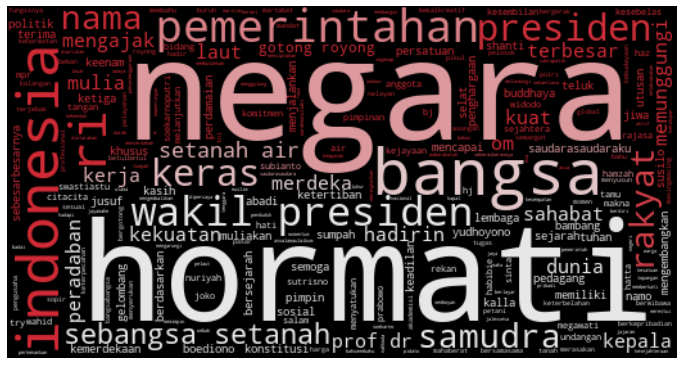

In [60]:
# Generate a word cloud image
text = " ".join(text for text in cleaned_text)
mask = np.array(Image.open("indonesia.jpg"))
wordcloud_ina = WordCloud(background_color="black", mode="RGBA", max_words=10000, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[12,12])
plt.imshow(wordcloud_ina.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("ina_wine.png", format="png")

plt.show()